# Introduction 

This project aims to develop a machine learning model that can estimate the medical insurance premium a person might be charged based on various factors such as age, gender, BMI, number of children, smoking habits, and geographic region.
This project demonstrates the practical application of data preprocessing, feature engineering, model training, evaluation, and improvement strategies to solve a real-world prediction problem in the healthcare domain.

### Importing the Dependencies

In [121]:
import numpy as np

In [122]:
import pandas as pd

In [123]:
import matplotlib.pyplot as plt

In [124]:
import seaborn as sns

### Data collection

In [126]:
df = pd.read_csv(r"C:\Users\athar\Downloads\Datasets\insurance.csv")

In [127]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [128]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [129]:
df.shape

(1338, 7)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [131]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

### Exploratory Data Anaysis

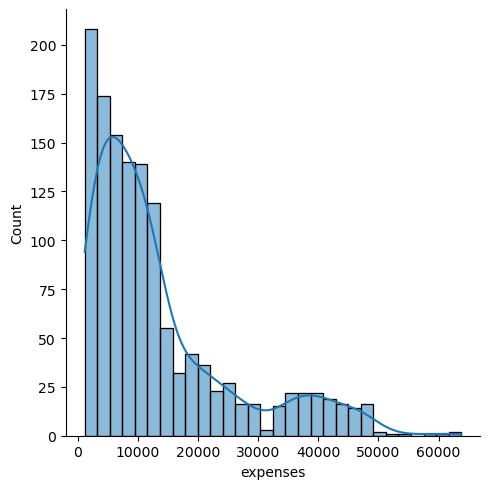

In [133]:
sns.displot(df['expenses'] , kde = True)

C:\Users\athar\AppData\Local\Temp\ipykernel_17016\198831124.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'sex' , data = df ,  palette='bright')


Text(0.5, 1.0, 'Sex')

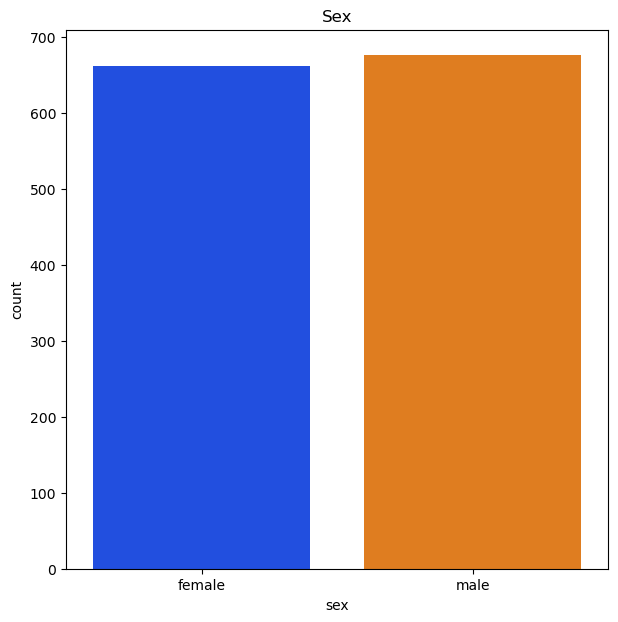

In [134]:
plt.figure(figsize = (7,7))
sns.countplot(x = 'sex' , data = df ,  palette='bright')
plt.title('Sex')

In [135]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\athar\AppData\Local\Temp\ipykernel_17016\2798258322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'smoker' , data = df ,  palette='bright')


Text(0.5, 1.0, 'smoker')

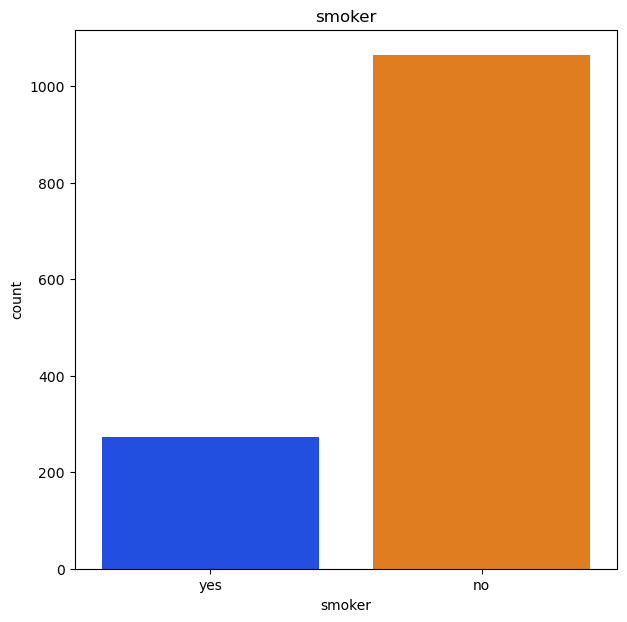

In [136]:
plt.figure(figsize = (7,7))
sns.countplot(x = 'smoker' , data = df ,  palette='bright')
plt.title('smoker')

In [137]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

C:\Users\athar\AppData\Local\Temp\ipykernel_17016\1686393120.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'children' , data = df , palette='bright')


Text(0.5, 1.0, 'Children')

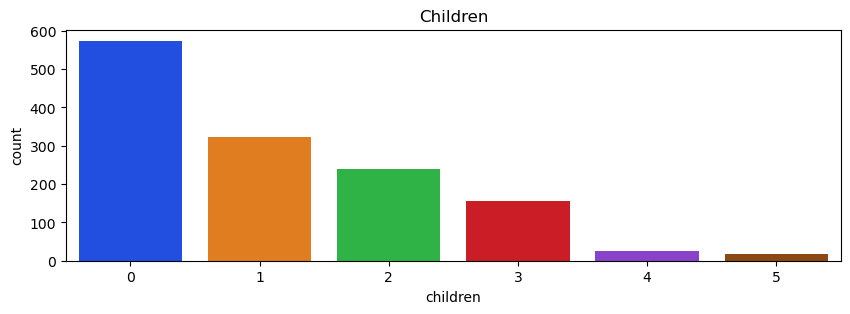

In [138]:
plt.figure(figsize = (10,3))
sns.countplot(x = 'children' , data = df , palette='bright')
plt.title('Children')

### Data Preprocessing - Encoding

In [140]:
from sklearn.preprocessing import OneHotEncoder

In [141]:
OHE = OneHotEncoder(drop = 'first')

In [142]:
n_df = OHE.fit_transform(df[['sex' , 'smoker']]).toarray()

In [143]:
n_df

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 1.]])

In [144]:
new_df = pd.DataFrame(n_df , columns = ['sex_male' , 'smoker_yes'])

In [145]:
new_df.head(2)

,sex_male,smoker_yes
0,0.0,1.0
1,1.0,0.0


In [146]:
df[['sex_male' , 'smoker_yes']] = new_df

In [147]:
df

,age,sex,bmi,children,smoker,region,expenses,sex_male,smoker_yes
0,19,female,27.9,0,yes,southwest,16884.92,0.0,1.0
1,18,male,33.8,1,no,southeast,1725.55,1.0,0.0
2,28,male,33.0,3,no,southeast,4449.46,1.0,0.0
3,33,male,22.7,0,no,northwest,21984.47,1.0,0.0
4,32,male,28.9,0,no,northwest,3866.86,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,1.0,0.0
1334,18,female,31.9,0,no,northeast,2205.98,0.0,0.0
1335,18,female,36.9,0,no,southeast,1629.83,0.0,0.0
1336,21,female,25.8,0,no,southwest,2007.95,0.0,0.0


In [148]:
df.shape

(1338, 9)

In [149]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [150]:
en_ord_data = [['southwest', 'southeast', 'northwest', 'northeast']]

### Encoding the Categorical feature

In [152]:
from sklearn.preprocessing import OrdinalEncoder

In [153]:
OE  = OrdinalEncoder(categories=en_ord_data)

In [154]:
df['region'] = OE.fit_transform(df[['region']])

In [155]:
df.drop(columns = 'smoker' , inplace = True)

In [156]:
df.drop(columns = 'sex' , inplace = True)

In [157]:
df.head(2)

,age,bmi,children,region,expenses,sex_male,smoker_yes
0,19,27.9,0,0.0,16884.92,0.0,1.0
1,18,33.8,1,1.0,1725.55,1.0,0.0


### Splitting the Feature and Target

In [159]:
x = df.drop(columns = 'expenses')

In [160]:
y = df['expenses']

### train_test_split

Splitting the data into training data and testing data

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
x_train , x_test ,y_train , y_test = train_test_split(x , y , test_size=0.1, random_state=25)

In [165]:
x.shape

(1338, 6)

### Model Training

In [167]:
from sklearn.ensemble import RandomForestRegressor

In [168]:
RFR = RandomForestRegressor(
    max_depth=10,          
    min_samples_split=10,
    min_samples_leaf=4,    
    n_estimators=100,    
    random_state=4
)

In [169]:
RFR.fit(x_train , y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=4)

In [170]:
RFR.score(x_train , y_train)*100

90.81227902878162

In [171]:
RFR.score(x_test , y_test)*100

91.92214313452732

In [172]:
RFR.predict(x)

array([17951.70213044,  3869.56129377,  5939.898961  , ...,
        2992.61901565,  2130.55165649, 28124.94876583])

In [173]:
x

,age,bmi,children,region,sex_male,smoker_yes
0,19,27.9,0,0.0,0.0,1.0
1,18,33.8,1,1.0,1.0,0.0
2,28,33.0,3,1.0,1.0,0.0
3,33,22.7,0,2.0,1.0,0.0
4,32,28.9,0,2.0,1.0,0.0
...,...,...,...,...,...,...
1333,50,31.0,3,2.0,1.0,0.0
1334,18,31.9,0,3.0,0.0,0.0
1335,18,36.9,0,1.0,0.0,0.0
1336,21,25.8,0,0.0,0.0,0.0


### Building The Predictive System

In [175]:
input_data = (61 , 29.1 , 0 , 2.0 , 1.0 , 0.0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = RFR.predict(input_data_reshaped)
print('The total expenses are in USD : ' , prediction)

The total expenses are in USD :  [14209.85738363]


C:\Users\athar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
